In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
def dict_to_list(d): # converts dictionary to two lists (key and value)
    #d must be a dictionary containing the value of parameters and their names
    key = list(d.keys())
    value = list(d.values())
    return value, key
start_guess = {'pop_rad_yield_0_': 1E4, 'pop_rad_yield_1_': 1E38, 'pop_rad_yield_2_': 1E4, 'clumping_factor': 1}
value_guess, key_guess = dict_to_list(start_guess)

In [3]:
nstep = 10000000
param_length = 4

In [4]:
df1 = pd.read_csv("mcmc_params.txt", sep=" ", header=None)

In [5]:
df1

,0,1,2,3
0,0.333333,0.270346,0.270346,0.487179
1,0.331996,0.272468,0.275850,0.486696
2,0.331996,0.272468,0.275850,0.486696
3,0.334644,0.280457,0.276013,0.486887
4,0.334644,0.280457,0.276013,0.486887
...,...,...,...,...
9999995,0.204886,0.351324,0.353573,0.409395
9999996,0.204886,0.351324,0.353573,0.409395
9999997,0.204886,0.351324,0.353573,0.409395
9999998,0.204886,0.351324,0.353573,0.409395


In [6]:
#m =ps.iloc[:,0].tolist()
params = np.zeros((nstep, param_length))
for i in range(param_length):
    params[:, i] = list(df1.iloc[:, i])

print(np.shape(params))

(10000000, 4)


In [7]:
ps = np.zeros((nstep, param_length))
for i in range(param_length):
    ps[:, i] = np.abs(np.fft.fft(params[:, i]))**2
    
freqs = np.fft.rfftfreq(nstep)
idx = np.argsort(freqs)
#np.savetxt('ps.gz' , ps) 

In [8]:
freqs = np.fft.rfftfreq(nstep)
idx = np.argsort(freqs)

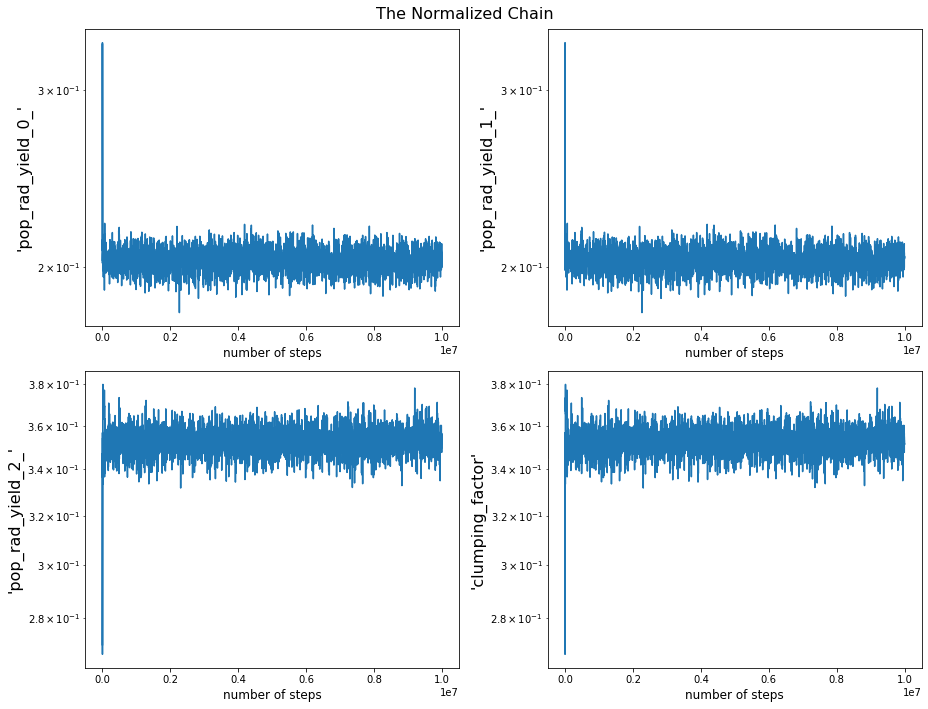

In [9]:
fig, ax_list = plt.subplots(2, 2, figsize=(13,10))
fig.suptitle('The Normalized Chain', fontsize=16)

for i in range(2):
    for j in range(2):
        ax_list[i, j].semilogy(params[:, i])
        ax_list[i, j].set_ylabel(repr(key_guess[i*2+ j]), fontsize=16)
        ax_list[i, j].set_xlabel('number of steps', fontsize=12)
        #ax_list[i, j].set_xlim(right = 0.2E6)
        
plt.tight_layout()
plt.show()

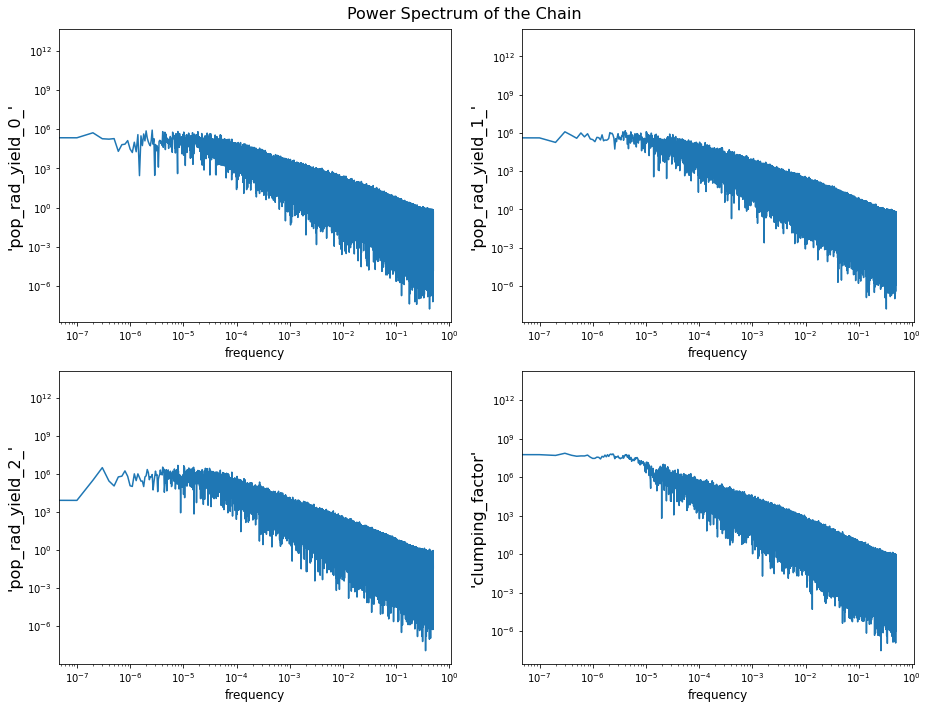

In [10]:
fig, ax_list = plt.subplots(2, 2, figsize=(13,10))
fig.suptitle('Power Spectrum of the Chain', fontsize=16)

for i in range(2):
    for j in range(2):
        ax_list[i, j].loglog(freqs[idx], ps[idx, i*2+ j])
        ax_list[i, j].set_ylabel(repr(key_guess[i*2+ j]), fontsize=16)
        ax_list[i, j].set_xlabel('frequency', fontsize=12)
        #ax_list[i, j].set_ylim(0, 1E2)
plt.tight_layout()
plt.show()

In [11]:
params = params[500000:-1, :]

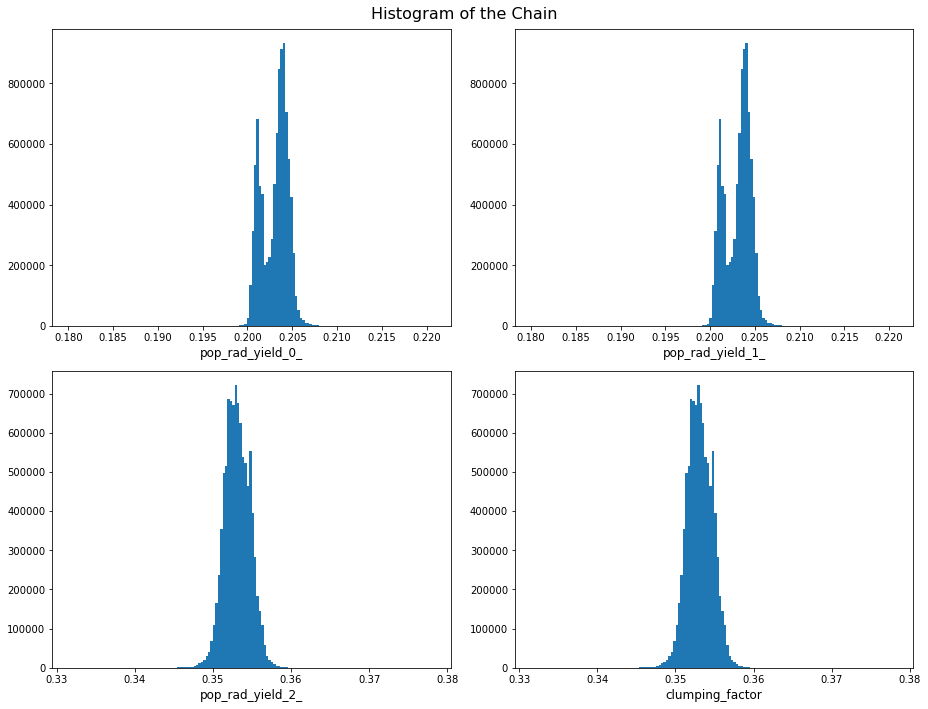

In [12]:
fig, ax_list = plt.subplots(2, 2, figsize=(13,10))
fig.suptitle('Histogram of the Chain', fontsize=16)

for i in range(2):
    for j in range(2):
        ax_list[i, j].hist(params[:, i], bins=150)
        #ax_list[i, j].set_ylabel(repr(key_guess[i*2+ j]), fontsize=16)
        ax_list[i, j].set_xlabel(key_guess[i*2+ j], fontsize=12)
        #ax_list[i, j].set_ylim(0, 1E2)
plt.tight_layout()
plt.show()

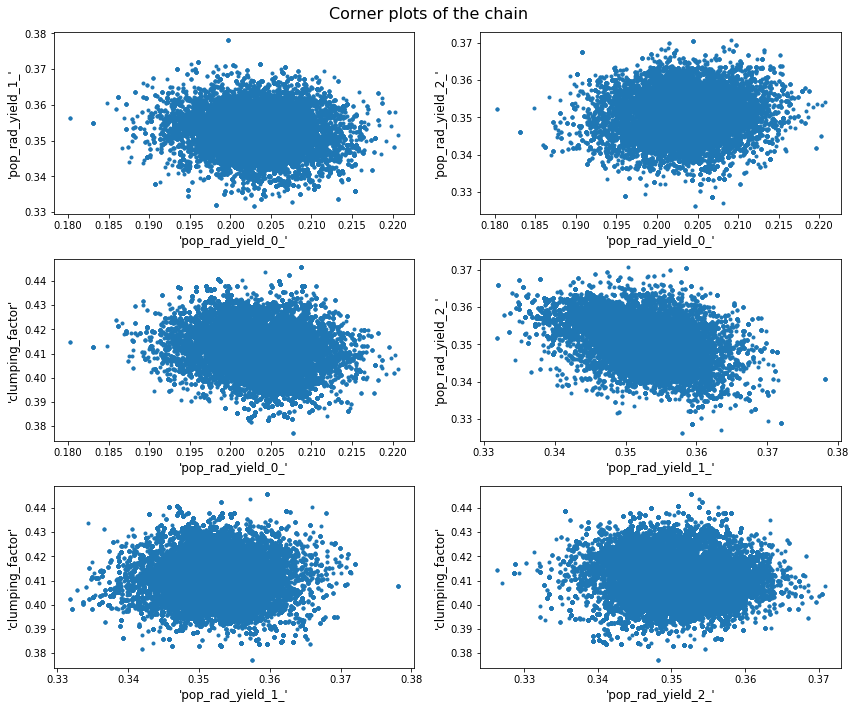

In [13]:
fig, ax_list = plt.subplots(3, 2, figsize=(12,10))
fig.suptitle('Corner plots of the chain', fontsize=16)

ax_list[0, 0].plot(params[:, 0], params[:, 1], linestyle = "", marker=".")
ax_list[0, 0].set_ylabel(repr(key_guess[1]), fontsize=12)
ax_list[0, 0].set_xlabel(repr(key_guess[0]), fontsize=12)

ax_list[0, 1].plot(params[:, 0], params[:, 2], linestyle = "", marker=".")
ax_list[0, 1].set_ylabel(repr(key_guess[2]), fontsize=12)
ax_list[0, 1].set_xlabel(repr(key_guess[0]), fontsize=12)
    
ax_list[1, 0].plot(params[:, 0], params[:, 3], linestyle = "", marker=".")
ax_list[1, 0].set_ylabel(repr(key_guess[3]), fontsize=12)
ax_list[1, 0].set_xlabel(repr(key_guess[0]), fontsize=12)

ax_list[1, 1].plot(params[:, 1], params[:, 2], linestyle = "", marker=".")
ax_list[1, 1].set_ylabel(repr(key_guess[2]), fontsize=12)
ax_list[1, 1].set_xlabel(repr(key_guess[1]), fontsize=12)

ax_list[2, 0].plot(params[:, 1], params[:, 3], linestyle = "", marker=".")
ax_list[2, 0].set_ylabel(repr(key_guess[3]), fontsize=12)
ax_list[2, 0].set_xlabel(repr(key_guess[1]), fontsize=12)

ax_list[2, 1].plot(params[:, 2], params[:, 3], linestyle = "", marker=".")
ax_list[2, 1].set_ylabel(repr(key_guess[3]), fontsize=12)
ax_list[2, 1].set_xlabel(repr(key_guess[2]), fontsize=12)

plt.tight_layout()
plt.show()

# The gaussian fit

In [14]:
bins = 150
hist = np.zeros((bins, 4))
edges = np.zeros((bins , 4))
#parameters = 
for i in range(4):
    counts, bin_edges = np.histogram(params[:, i], bins=bins)
    bin_edges = np.delete (bin_edges , 0)
    #print(np.shape(bin_edges))
    edges [:, i] = bin_edges 
    hist [:, i] = counts
    #parameters, covariance = curve_fit(Gauss, xdata, ydata)

In [15]:
# Define the Gaussian function
x = edges [:, 1]
y = hist [:, 1]
n = len(x)                          #the number of data


def gauss(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [16]:
guess = [700000, 0.353, 0.0015]
parameters, covariance = curve_fit(gauss, x, y, p0=guess)

print(parameters)

[7.10370118e+05 3.53215402e-01 1.66593568e-03]


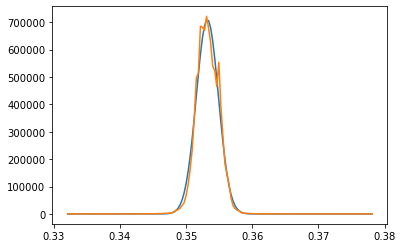

In [17]:
# to compare the two

model = gauss (x, parameters[0], parameters[1], parameters[2])
plt.plot (x, model)
plt.plot(x, y)
plt.show()

# The Covariance Matrix

In [18]:
def draw_samples(cov,n):
    m=cov.shape[0]
    print(m)
    mat=np.random.randn(m,n)
    L=np.linalg.cholesky(cov)
    #the shape of the output is: number of samples * number of params
    return (L@mat).T

chain = params
for i in range(chain.shape[1]): # ommiting the mean from the chain
    chain[:,i] = chain[:,i] - np.mean(chain[:,i])

mycov=(chain.T@chain)/chain.shape[0]
n=100
#n= 100000
samples=draw_samples(mycov,n)
cov2=samples.T@samples/n

4


In [24]:
np.shape(chain)

(9499999, 4)

In [19]:
np.savetxt('samples.gz', samples)

In [20]:
print(np.shape(samples))

(100, 4)


In [21]:
print(mycov)
print(cov2)

[[ 2.16377475e-06 -1.71379864e-06  3.75195835e-06 -4.25393090e-06]
 [-1.71379864e-06  2.71123918e-06 -3.87473242e-06  3.09698410e-06]
 [ 3.75195835e-06 -3.87473242e-06  1.02778033e-05 -9.12309494e-06]
 [-4.25393090e-06  3.09698410e-06 -9.12309494e-06  1.26773746e-05]]
[[ 1.61808467e-06 -1.25121276e-06  2.80691743e-06 -3.27466782e-06]
 [-1.25121276e-06  2.22024093e-06 -3.01321028e-06  2.18690656e-06]
 [ 2.80691743e-06 -3.01321028e-06  8.95390917e-06 -7.61443344e-06]
 [-3.27466782e-06  2.18690656e-06 -7.61443344e-06  1.10696361e-05]]


In [22]:
diff = mycov - cov2
diff_r = (diff/mycov)
print(diff_r)

[[0.25219357 0.26991846 0.25187937 0.23020192]
 [0.26991846 0.18109736 0.22234365 0.29385929]
 [0.25187937 0.22234365 0.128811   0.16536729]
 [0.23020192 0.29385929 0.16536729 0.12681951]]
